In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

```Python
index_col = False
``` 
hjalp meg løse et problem der Pandas tolket AppID som ID kolonen, og alt ble forskjøvet til venstre

In [35]:
data = pd.read_csv("games.csv", index_col=False)
data

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97405,3080940,Femdom Game World: Mom,"Aug 22, 2024",0 - 20000,0,0,4.19,0,0,. Femdom Game World - is a fascinating series ...,...,0,0,0,Femdom Game World,Femdom Game World,"Single-player,Family Sharing",Casual,NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97406,2593970,Blocky Farm,"Aug 30, 2024",0 - 0,0,0,8.99,0,0,Enter the charming world of Blocky Farm where ...,...,0,0,0,Forever Entertainment S. A.,Forever Entertainment S. A.,"Single-player,Steam Achievements,Partial Contr...","Casual,Simulation,Strategy",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97407,3137150,Infiltrate & Extract,"Aug 30, 2024",0 - 0,0,0,0.00,0,0,Mission brief: You are deployed to a heavily g...,...,0,0,0,Carlos Garrido,DigiPen Intsitute of Technology,Single-player,"Strategy,Free To Play",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97408,3124670,Escape The Garage,"Aug 29, 2024",0 - 0,0,0,4.99,0,0,"Welcome to Escape The Garage, the thrilling es...",...,0,0,0,CryneX,"CryneX,CryTechGames","Single-player,Steam Achievements,Family Sharing","Adventure,Casual,Indie",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


Her tenker jeg at alle spillene som har blitt spilt må ha en *Peak CCU* (Hvor mange som har spilt spillet samtidig) > 0. Dette er ikke en perfekt måte, men det hjelper med litt bedre databehandling. 

In [36]:
dataWithoutUnplayedGames = data[data["Peak CCU"] > 0]
dataWithoutUnplayedGames

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,0,Feel tired of auto-fight? Feel tired of boring...,...,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
6,1659180,TD Worlds,"Jan 9, 2022",0 - 20000,3,0,10.99,0,1,"TD Worlds is a dynamic, highly strategical gam...",...,0,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
7,1968760,Legend of Rome - The Wrath of Mars,"May 5, 2022",0 - 20000,2,0,9.99,0,0,When the Roman people honored a simple warrior...,...,0,0,0,magnussoft,magnussoft,"Single-player,Steam Cloud",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
8,1178150,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,0,14.99,0,0,'MazM: Jekyll and Hyde' is a darkly entertaini...,...,0,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
10,1026420,WARSAW,"Oct 2, 2019",20000 - 50000,5,0,23.99,0,0,Use everything at your disposal to help a team...,...,0,93,0,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97382,3125910,The Mightiest Sword is Mine!,"Aug 15, 2024",0 - 20000,2,0,2.99,0,0,Embark on a Journey of Limitless Growth! What ...,...,0,0,0,mihibiki,mihibiki,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie","Casual,Clicker,Cute,Character Customization,Si...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97388,2420240,HAREM！RANCH LIFE,"Aug 23, 2024",0 - 20000,76,0,16.19,0,0,This is a relaxing farm RPG game where you can...,...,0,0,0,GNT BOKUJO,072 Project,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation","Sexual Content,Hentai,Farming Sim,City Builder...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97389,2338940,CyberRush,"Aug 28, 2024",0 - 20000,1,0,3.59,0,0,Buckle up for an electrifying ride in CyberRus...,...,0,0,0,Dream Engine,Dream Engine,"Single-player,Steam Achievements,Family Sharing","Action,Adventure,Casual,Indie,Racing,Sports,St...",NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97394,2661620,Love in Login,"Aug 26, 2024",0 - 20000,10,0,8.44,0,0,Original story ranked #1 in Romance category o...,...,0,0,0,"Metacraft,Cometsoft Inc.",Smilegate,"Single-player,Steam Achievements,Steam Cloud,F...",Simulation,NaN,https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


In [37]:
dataWithoutUnplayedGames.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'Discount', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

Siden Steam ikke sier hvor mange spill som har blitt solgt måtte datasettet ha en estimat. Det jeg valgte å gjøre var å bare ta middelverdien av disse for å kunne regne med. Dette skaper noen interessante grafer senere. 

In [38]:
def convertEstimate(numbers):
    if type(numbers) == int:
        return numbers
    
    numbers = numbers.replace(" - ", " ")
    lower, upper = map(int, numbers.split())
    return ((upper + lower) / 2)

dataWithoutUnplayedGames["Estimated owners middle value"] = dataWithoutUnplayedGames["Estimated owners"].apply(convertEstimate)

dataWithoutUnplayedGames.head()

C:\Users\thass\AppData\Local\Temp\ipykernel_18112\673815392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithoutUnplayedGames["Estimated owners middle value"] = dataWithoutUnplayedGames["Estimated owners"].apply(convertEstimate)


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,Estimated owners middle value
5,1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,0,Feel tired of auto-fight? Feel tired of boring...,...,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,75000.0
6,1659180,TD Worlds,"Jan 9, 2022",0 - 20000,3,0,10.99,0,1,"TD Worlds is a dynamic, highly strategical gam...",...,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,10000.0
7,1968760,Legend of Rome - The Wrath of Mars,"May 5, 2022",0 - 20000,2,0,9.99,0,0,When the Roman people honored a simple warrior...,...,0,0,magnussoft,magnussoft,"Single-player,Steam Cloud",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,10000.0
8,1178150,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,0,14.99,0,0,'MazM: Jekyll and Hyde' is a darkly entertaini...,...,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,10000.0
10,1026420,WARSAW,"Oct 2, 2019",20000 - 50000,5,0,23.99,0,0,Use everything at your disposal to help a team...,...,93,0,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,35000.0


In [39]:
list(dataWithoutUnplayedGames.columns).index("Estimated owners middle value")

40

In [40]:
dataWithoutUnplayedGames.iloc[0]

AppID                                                                      1469160
Name                                                                Wartune Reborn
Release date                                                          Feb 26, 2021
Estimated owners                                                    50000 - 100000
Peak CCU                                                                        68
Required age                                                                     0
Price                                                                          0.0
Discount                                                                         0
DLC count                                                                        0
About the game                   Feel tired of auto-fight? Feel tired of boring...
Supported languages                                                    ['English']
Full audio languages                                                            []
Revi

In [41]:
genres = {}
genreSales = {}
categories = {}
categorySales = {}

printed = False
for i in dataWithoutUnplayedGames.itertuples():
    genresUsed = str(i.Genres).strip().split(",")
    categoriesUsed = str(i.Categories).strip().split(",")

    for j in genresUsed:
        if j == "nan":
            j = "None"
            
        if j not in genreSales.keys():
            genreSales[j] = i._41  
        else: 
            genreSales[j] += i._41

    for j in categoriesUsed:
        if j == "nan":
            j = "None"

        if j not in categorySales.keys():
            categorySales[j] = i._41  
        else: 
            categorySales[j] += i._41

for i in data.itertuples():
    genresUsed = str(i.Genres).strip().split(",")
    categoriesUsed = str(i.Categories).strip().split(",")

    for j in genresUsed:
        if j == "nan":
            j = "None"

        if j not in genres.keys():
            genres[j] = 1
        else: 
            genres[j] += 1

    for j in categoriesUsed:
        if j == "nan":
            j = "None"

        if j not in categories.keys():
            categories[j] = 1
        else: 
            categories[j] += 1
    
genres = dict(sorted(genres.items(), key=lambda item: item[1]))
genreSales = dict(sorted(genreSales.items(), key=lambda item: item[1]))
categories = dict(sorted(categories.items(), key=lambda item: item[1]))
categorySales = dict(sorted(categorySales.items(), key=lambda item: item[1]))

print(genres)
print(genreSales)

{'Documentary': 1, 'Episodic': 1, 'Tutorial': 1, '360 Video': 1, 'Movie': 2, 'Short': 2, 'Accounting': 26, 'Sexual Content': 108, 'Web Publishing': 115, 'Nudity': 120, 'Photo Editing': 150, 'Software Training': 218, 'Audio Production': 218, 'Game Development': 259, 'Gore': 311, 'Video Production': 317, 'Free To Play': 323, 'Education': 419, 'Animation & Modeling': 442, 'Violent': 527, 'Design & Illustration': 538, 'Utilities': 925, 'Massively Multiplayer': 2422, 'Racing': 3482, 'Sports': 4262, 'None': 4841, 'Free to Play': 7920, 'Early Access': 12097, 'RPG': 16657, 'Strategy': 17760, 'Simulation': 18608, 'Adventure': 35864, 'Action': 38004, 'Casual': 39308, 'Indie': 64501}
{'Free To Play': 10000.0, 'Accounting': 310000.0, 'Sexual Content': 620000.0, 'Movie': 750000.0, 'Nudity': 2000000.0, 'Education': 2715000.0, 'Game Development': 3755000.0, 'Software Training': 4045000.0, 'Audio Production': 4585000.0, 'Web Publishing': 4710000.0, 'Gore': 5500000.0, 'Violent': 8160000.0, 'None': 1065

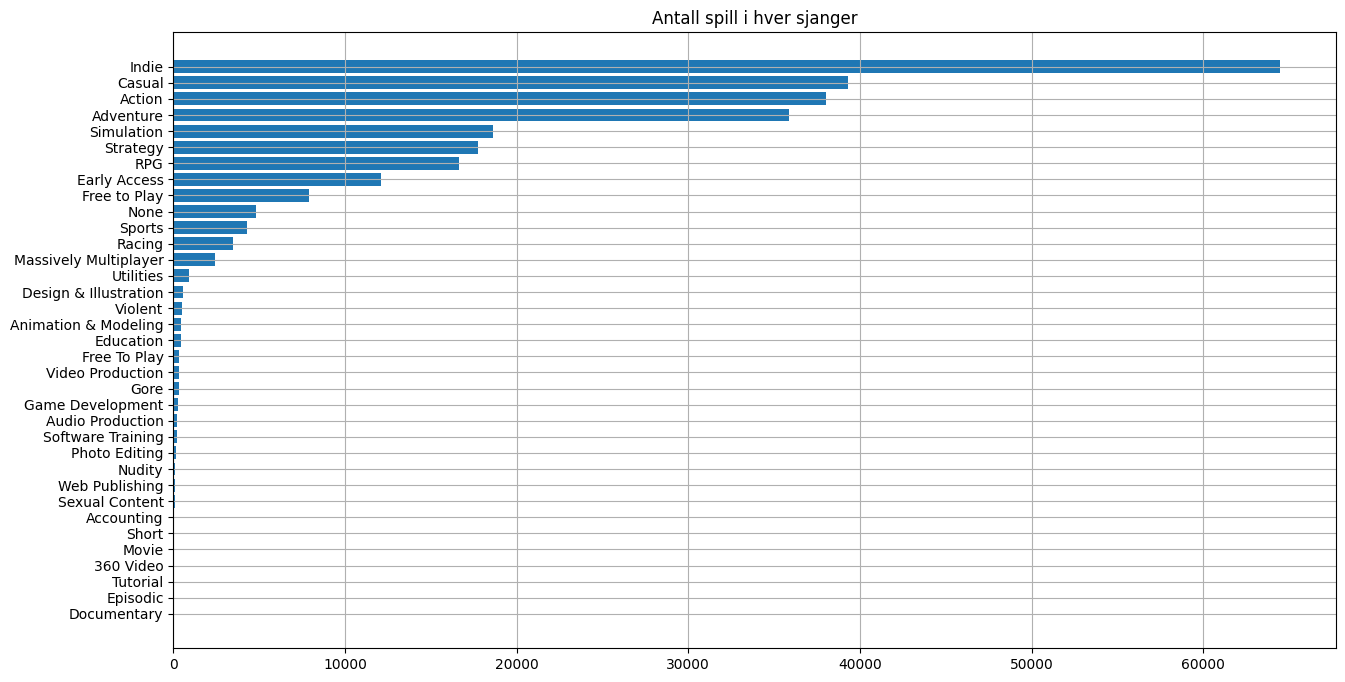

In [42]:
plt.barh(genres.keys(), genres.values())
plt.gcf().set_size_inches(15, 8)
plt.title("Antall spill i hver sjanger")
plt.grid()

plt.savefig("visualiseringer/antallSjanger.png")

plt.show()

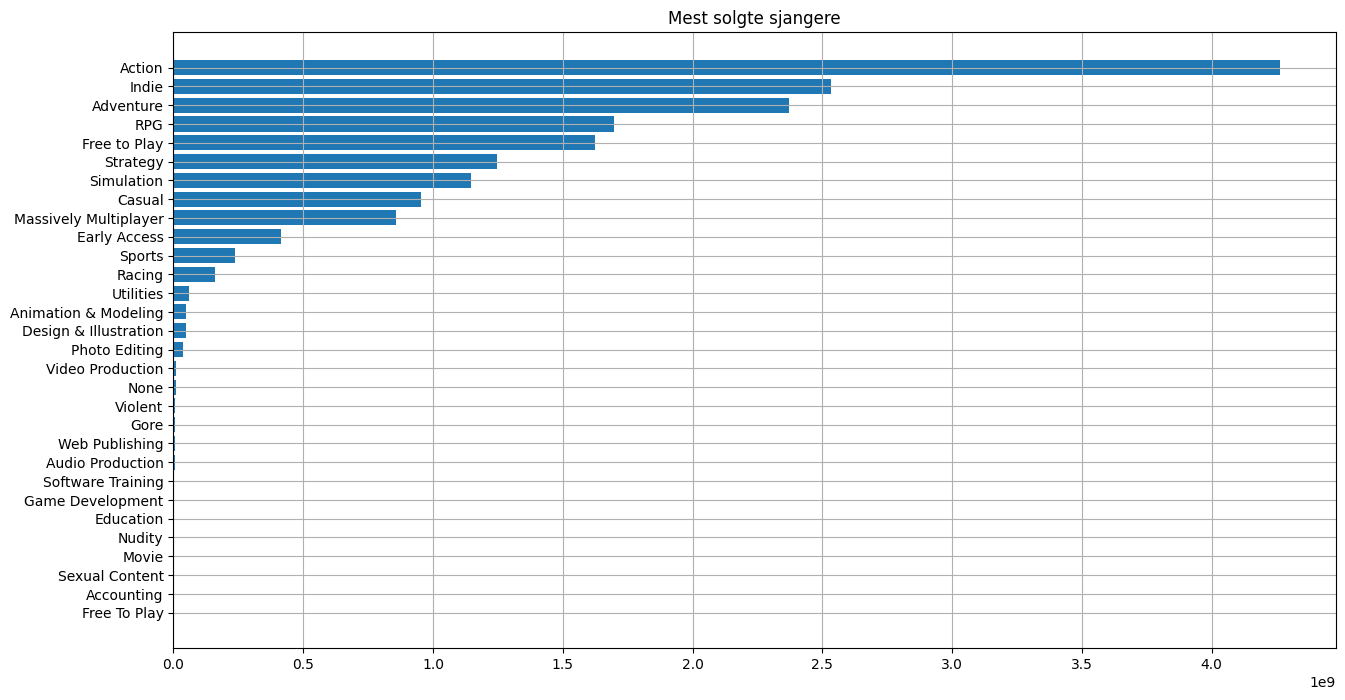

In [43]:
plt.barh(genreSales.keys(), genreSales.values())
plt.gcf().set_size_inches(15, 8)
plt.title("Mest solgte sjangere")
plt.grid()

plt.savefig("visualiseringer/mestSolgtSjanger.png")

plt.show()

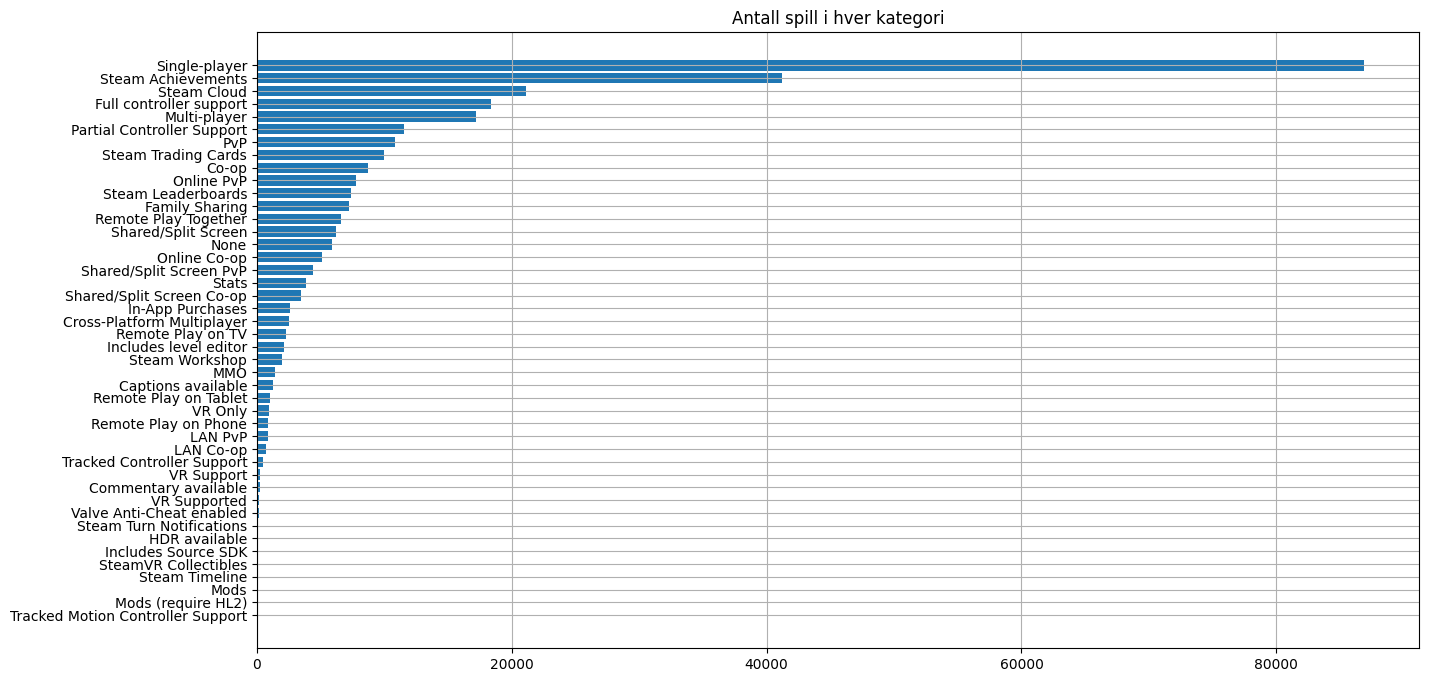

In [44]:
plt.barh(categories.keys(), categories.values())
plt.gcf().set_size_inches(15, 8)
plt.title("Antall spill i hver kategori")
plt.grid()

plt.savefig("visualiseringer/antallKategorier.png")

plt.show()

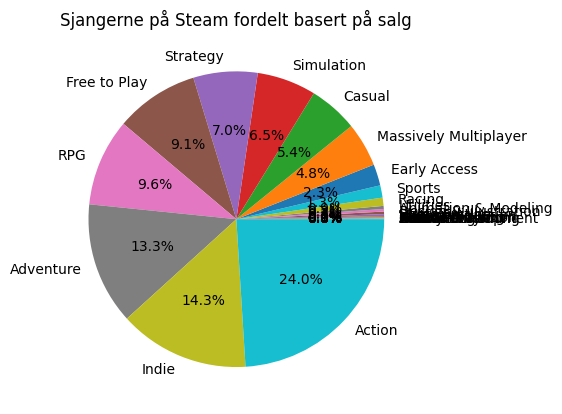

In [62]:
plt.title("Sjangerne på Steam fordelt basert på salg")

plt.pie(genreSales.values(), labels=genreSales.keys(), autopct='%1.1f%%')
plt.savefig("visualiseringer/sjangereSolgt")

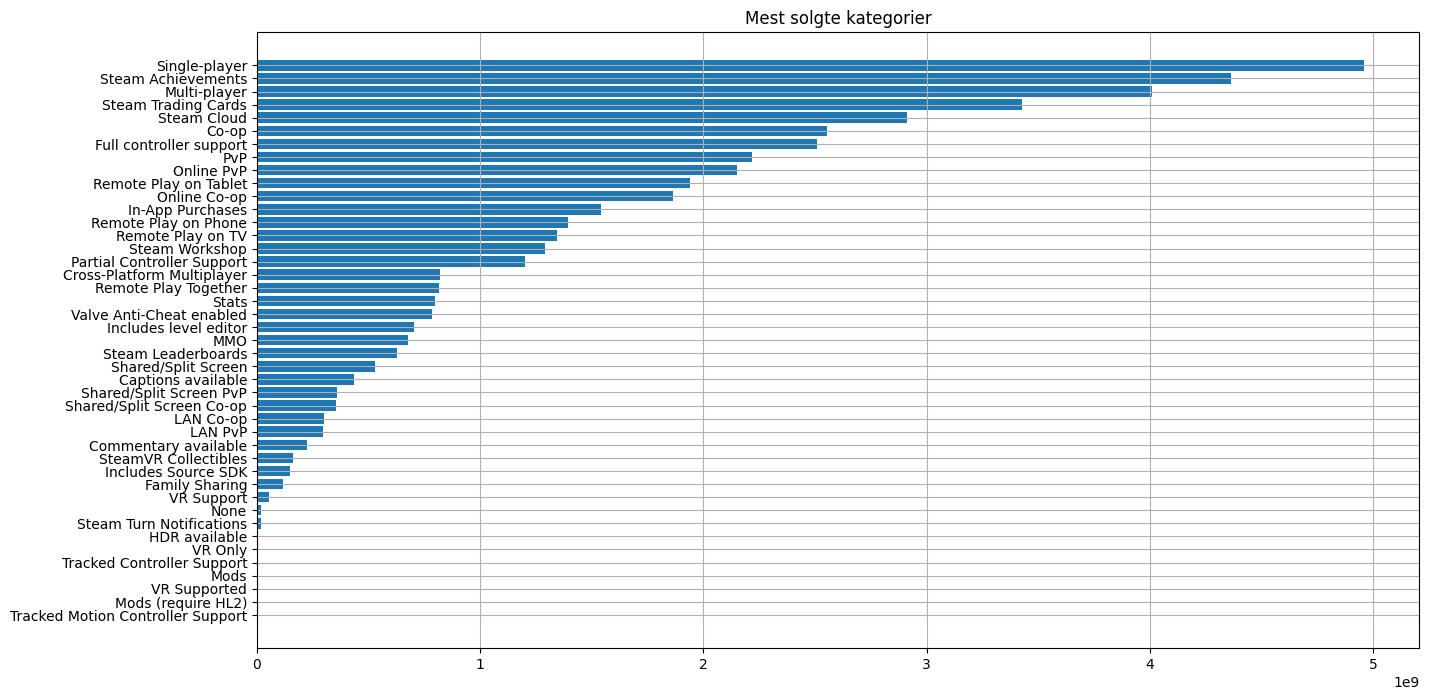

In [45]:
plt.barh(categorySales.keys(), categorySales.values())
plt.gcf().set_size_inches(15, 8)
plt.title("Mest solgte kategorier")
plt.grid()

plt.savefig("visualiseringer/mestSolgtKategori.png")

plt.show()

In [46]:
top50Spill = dataWithoutUnplayedGames.sort_values("Estimated owners middle value", ascending=False).head(50)
top50Spill.head

<bound method NDFrame.head of          AppID                              Name  Release date  \
17585      570                            Dota 2   Jul 9, 2013   
96948  2358720                Black Myth: Wukong  Aug 19, 2024   
30583      440                   Team Fortress 2  Oct 10, 2007   
46158      730  Counter-Strike: Global Offensive  Aug 21, 2012   
7030   1063730                         New World  Sep 28, 2021   
8885    578080               PUBG: BATTLEGROUNDS  Dec 21, 2017   
60437   238960                     Path of Exile  Oct 23, 2013   
47533   291550                        Brawlhalla  Oct 17, 2017   
31603   230410                          Warframe  Mar 25, 2013   
32756  1245620                        ELDEN RING  Feb 24, 2022   
16992   236390                       War Thunder  Aug 15, 2013   
47658  1599340                          Lost Ark  Feb 11, 2022   
736    1172470                     Apex Legends™   Nov 4, 2020   
28893   304930                          Unturn

Her ser vi problemet med måten jeg har valgt middelverdien. Mange spill ser ut som de har samme eiertall, men det er mye variasjon. Dette er fordi at mange hadde samme estimat. 

C:\Users\thass\AppData\Local\Temp\ipykernel_18112\1184689827.py:6: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) missing from font(s) DejaVu Sans.
  plt.savefig("visualiseringer/mestSolgteSpill.png")
C:\Users\thass\AppData\Local\Temp\ipykernel_18112\1184689827.py:6: UserWarning: Glyph 35895 (\N{CJK UNIFIED IDEOGRAPH-8C37}) missing from font(s) DejaVu Sans.
  plt.savefig("visualiseringer/mestSolgteSpill.png")
C:\Users\thass\AppData\Local\Temp\ipykernel_18112\1184689827.py:6: UserWarning: Glyph 20843 (\N{CJK UNIFIED IDEOGRAPH-516B}) missing from font(s) DejaVu Sans.
  plt.savefig("visualiseringer/mestSolgteSpill.png")
C:\Users\thass\AppData\Local\Temp\ipykernel_18112\1184689827.py:6: UserWarning: Glyph 33618 (\N{CJK UNIFIED IDEOGRAPH-8352}) missing from font(s) DejaVu Sans.
  plt.savefig("visualiseringer/mestSolgteSpill.png")
C:\Users\thass\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39740 (\N{CJK UNIFIED IDEOGRAPH-9B3C}) 

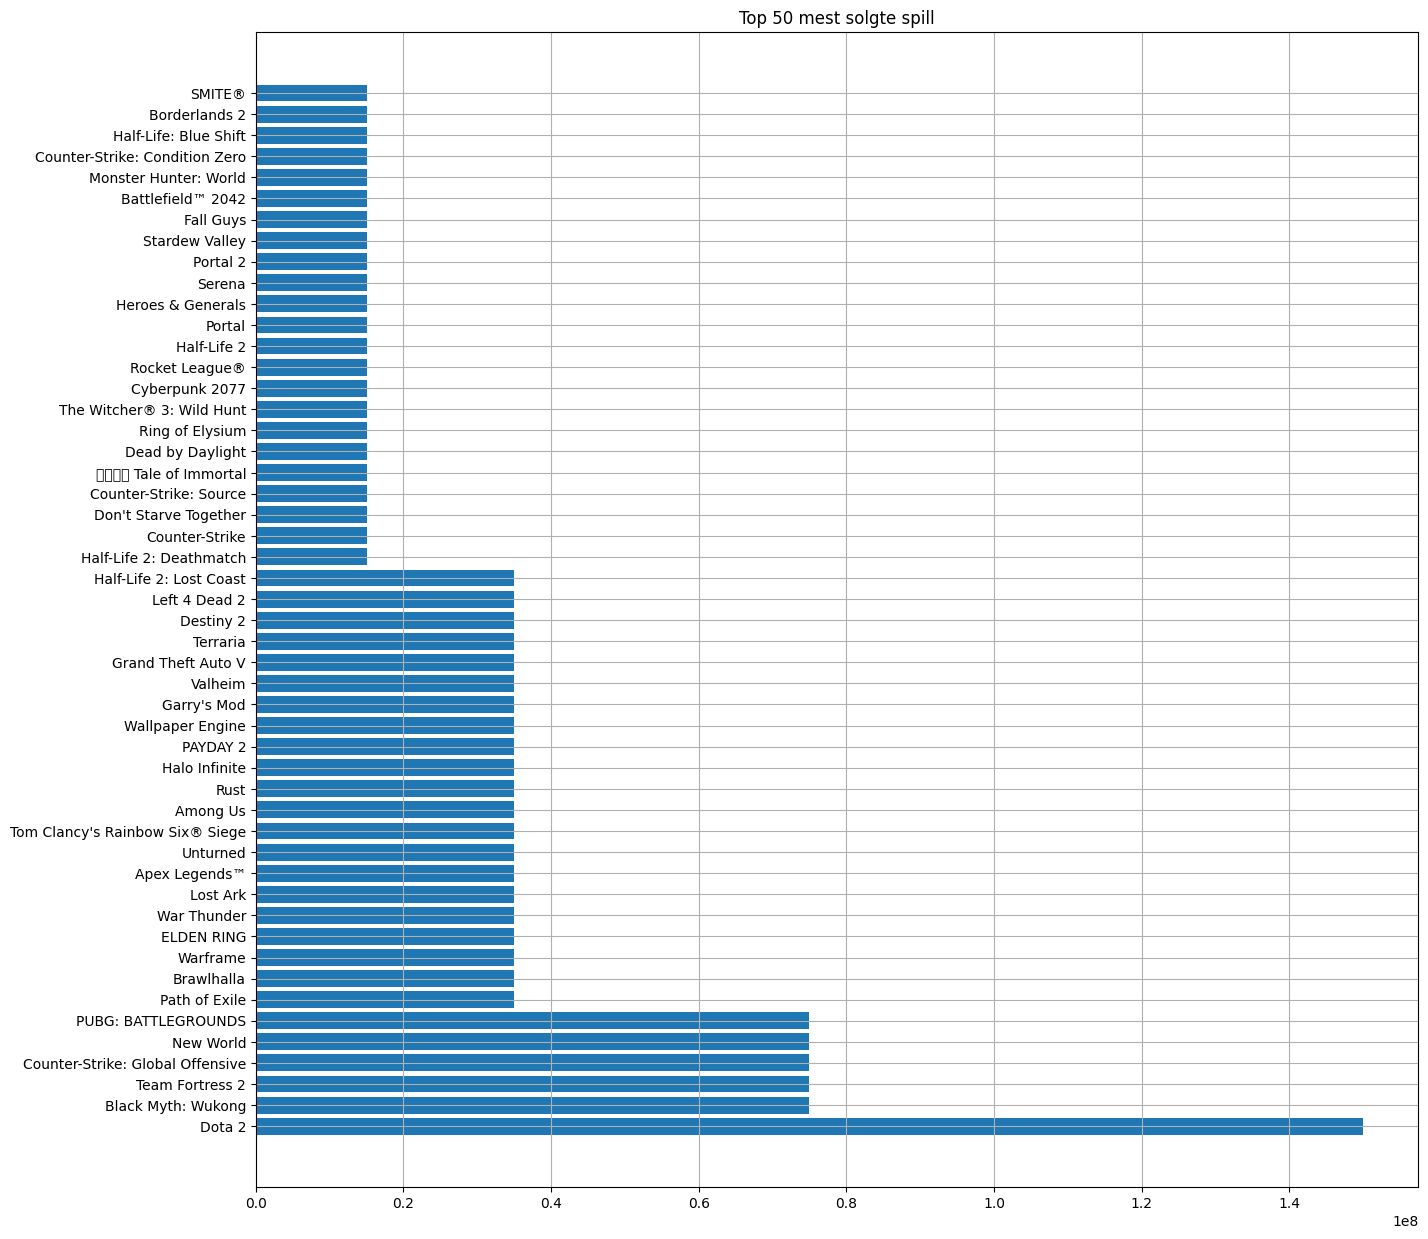

In [47]:
plt.barh(top50Spill["Name"], top50Spill["Estimated owners middle value"])
plt.gcf().set_size_inches(15, 15)
plt.title("Top 50 mest solgte spill")
plt.grid()

plt.savefig("visualiseringer/mestSolgteSpill.png")

plt.show()

In [48]:
top50StørstCCU = dataWithoutUnplayedGames.sort_values("Peak CCU", ascending=False).head(50)

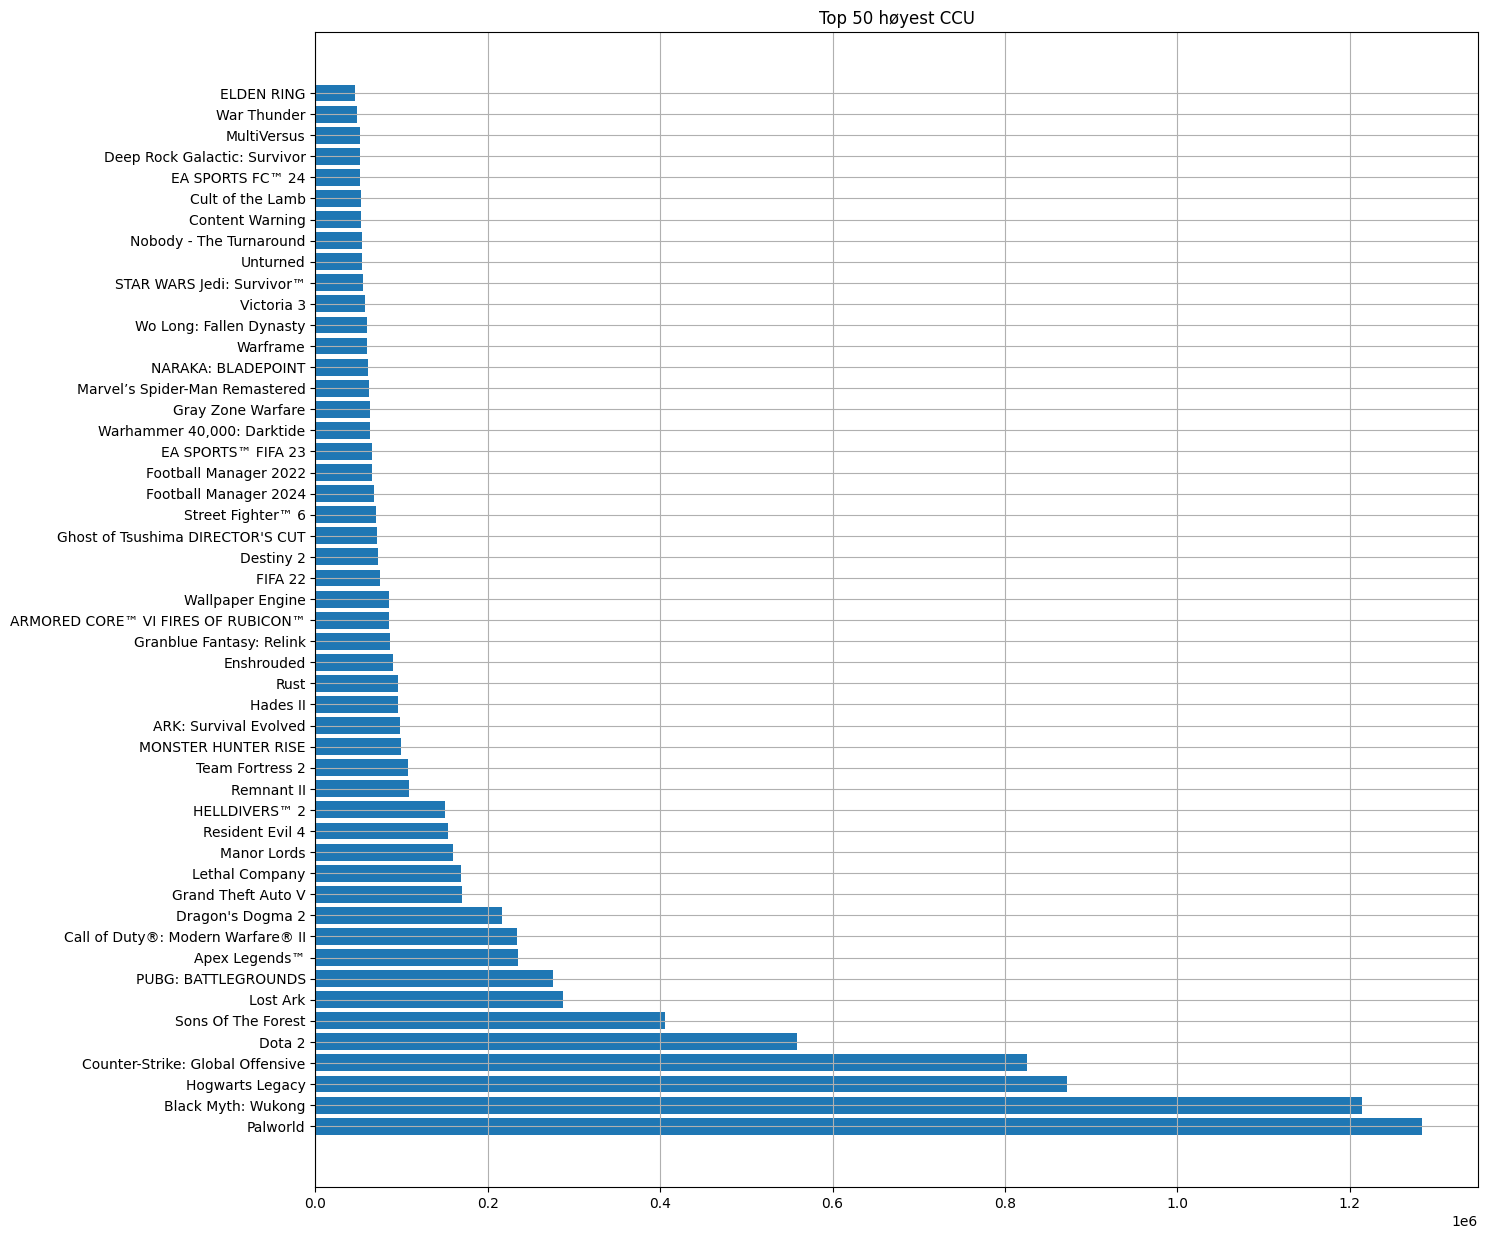

In [49]:
plt.barh(top50StørstCCU["Name"], top50StørstCCU["Peak CCU"])
plt.gcf().set_size_inches(15, 15)
plt.title("Top 50 høyest CCU")
plt.grid()

plt.savefig("visualiseringer/toppCCU.png")

plt.show()

In [50]:
steamGamesOverTime = {}

for i in data["Release date"]:
    year = int(re.findall("\d{4}", i)[0])

    if year in steamGamesOverTime.keys(): 
        steamGamesOverTime[year] += 1
    else: 
        steamGamesOverTime[year] = 1
    
steamGamesOverTime = dict(sorted(steamGamesOverTime.items()))
print(steamGamesOverTime)

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\thass\AppData\Local\Temp\ipykernel_18112\792335693.py:4: SyntaxWarning: invalid escape sequence '\d'
  year = int(re.findall("\d{4}", i)[0])


{1997: 2, 1998: 1, 1999: 3, 2000: 2, 2001: 4, 2002: 1, 2003: 3, 2004: 7, 2005: 7, 2006: 69, 2007: 109, 2008: 176, 2009: 343, 2010: 309, 2011: 286, 2012: 357, 2013: 492, 2014: 1634, 2015: 2693, 2016: 4416, 2017: 6334, 2018: 8183, 2019: 7827, 2020: 9647, 2021: 12392, 2022: 13989, 2023: 15542, 2024: 12580, 2025: 2}


Siden 2025 nettop har begynt er det en stor nedgang i 2025 tallene. Derfor valgte jeg å fjerne 2025 fra noen av resultatene. Dette datasettet mangler også noen spill, men den har de alle fleste. 

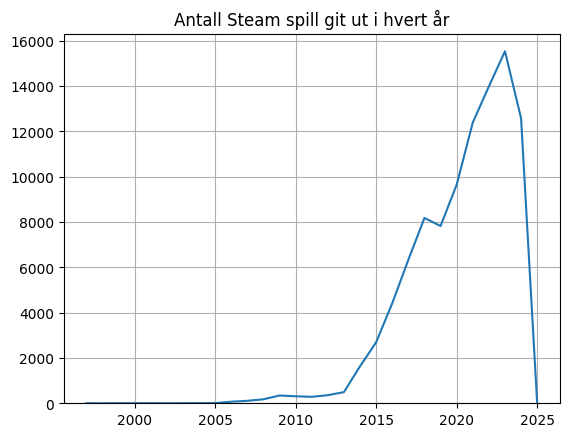

In [51]:
plt.plot(steamGamesOverTime.keys(), steamGamesOverTime.values())
plt.title("Antall Steam spill git ut i hvert år")
plt.ylim(bottom=0)

plt.grid()

plt.savefig("visualiseringer/spillHvertÅr.png")

plt.show()

In [52]:
without2025 = steamGamesOverTime.copy()
without2025.pop(2025)

2

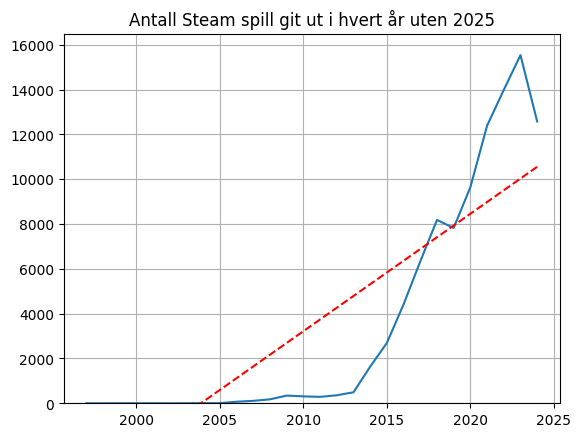

In [53]:
plt.plot(without2025.keys(), without2025.values())
plt.title("Antall Steam spill git ut i hvert år uten 2025")

z = np.polyfit(list(without2025.keys()), list(without2025.values()), 1)
p = np.poly1d(z)

plt.plot(without2025.keys(), p(list(without2025.keys())), "r--")
plt.ylim(bottom=0)

plt.grid()

plt.savefig("visualiseringer/spillHvertÅrUten2025.png")

plt.show()

In [54]:
cumultativeSteamGames = {k: v for k, v in zip(range(list(steamGamesOverTime.keys())[0], list(steamGamesOverTime.keys())[-1] + 1), np.cumsum(list(steamGamesOverTime.values())))}
cumultativeSteamGames

{1997: np.int64(2),
 1998: np.int64(3),
 1999: np.int64(6),
 2000: np.int64(8),
 2001: np.int64(12),
 2002: np.int64(13),
 2003: np.int64(16),
 2004: np.int64(23),
 2005: np.int64(30),
 2006: np.int64(99),
 2007: np.int64(208),
 2008: np.int64(384),
 2009: np.int64(727),
 2010: np.int64(1036),
 2011: np.int64(1322),
 2012: np.int64(1679),
 2013: np.int64(2171),
 2014: np.int64(3805),
 2015: np.int64(6498),
 2016: np.int64(10914),
 2017: np.int64(17248),
 2018: np.int64(25431),
 2019: np.int64(33258),
 2020: np.int64(42905),
 2021: np.int64(55297),
 2022: np.int64(69286),
 2023: np.int64(84828),
 2024: np.int64(97408),
 2025: np.int64(97410)}

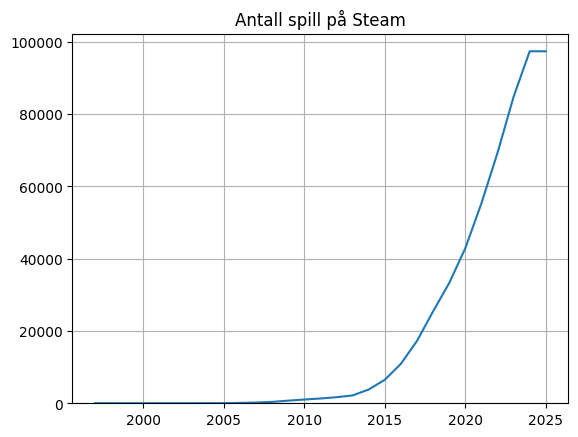

In [55]:
plt.plot(cumultativeSteamGames.keys(), cumultativeSteamGames.values())
plt.grid()
plt.ylim(bottom = 0)
plt.title("Antall spill på Steam")

plt.savefig("visualiseringer/antallSpill.png")

plt.show()

In [56]:
without2025CumSum = cumultativeSteamGames.copy()
without2025CumSum.pop(2025)

np.int64(97410)

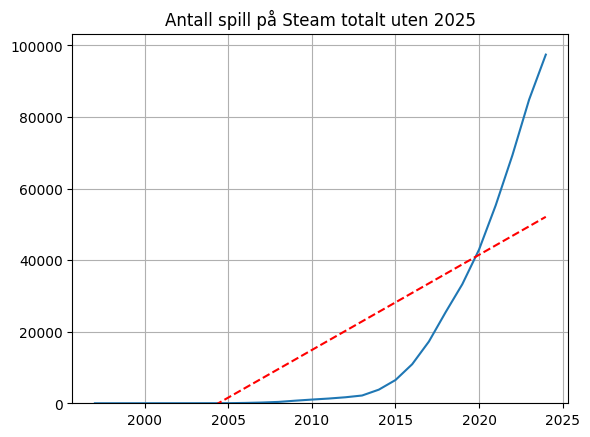

In [61]:
plt.plot(without2025CumSum.keys(), without2025CumSum.values())
plt.title("Antall spill på Steam totalt uten 2025")

z = np.polyfit(list(without2025CumSum.keys()), list(without2025CumSum.values()), 1)
p = np.poly1d(z)

plt.plot(without2025CumSum.keys(), p(list(without2025CumSum.keys())), "r--")
plt.ylim(bottom=0)

plt.grid()

plt.savefig("visualiseringer/antallSpillUten2025.png")